<a href="https://colab.research.google.com/github/Kushalgouda-Patil/Neural-Ninjas/blob/main/ICR_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
!git clone https://github.com/Kushalgouda-Patil/Neural-Ninjas.git
#!pip install pandas-profiling

fatal: destination path 'Neural-Ninjas' already exists and is not an empty directory.


In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import missingno as msno
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
#from pandas_profiling import ProfileReport

df_train=pd.read_csv("/content/Neural-Ninjas/Datsets/train.csv")

In [152]:
sns.set_style('whitegrid')
matplotlib.rcParams['font.size']=15
matplotlib.rcParams['figure.figsize'] = (18, 9)

In [132]:
'''
prof = ProfileReport(df1)
prof.to_file(output_file='output.html')
df_meta=pd.read_csv("/content/Neural-Ninjas/Datsets/greeks.csv")
df=pd.merge(df_meta,df_train,on="Id",how="inner")
df.drop(['Beta','Gamma','Delta','Epsilon'],axis=1,inplace=True)
'''

'\nprof = ProfileReport(df1)\nprof.to_file(output_file=\'output.html\')\ndf_meta=pd.read_csv("/content/Neural-Ninjas/Datsets/greeks.csv")\ndf=pd.merge(df_meta,df_train,on="Id",how="inner")\ndf.drop([\'Beta\',\'Gamma\',\'Delta\',\'Epsilon\'],axis=1,inplace=True)\n'

In [133]:
df_train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [134]:
df_train.shape

(617, 58)

In [135]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
AB,617.0,0.477149,0.468388,0.081187,0.252107,0.354659,0.559763,6.161666
AF,617.0,3502.013221,2300.322717,192.593280,2197.345480,3120.318960,4361.637390,28688.187660
AH,617.0,118.624513,127.838950,85.200147,85.200147,85.200147,113.739540,1910.123198
AM,617.0,38.968552,69.728226,3.177522,12.270314,20.533110,39.139886,630.518230
AR,617.0,10.128242,10.518877,8.138688,8.138688,8.138688,8.138688,178.943634
AX,617.0,5.545576,2.551696,0.699861,4.128294,5.031912,6.431634,38.270880
AY,617.0,0.060320,0.416817,0.025578,0.025578,0.025578,0.036845,10.315851
AZ,617.0,10.566447,4.350645,3.396778,8.129580,10.461320,12.969516,38.971568
BC,617.0,8.053012,65.166943,1.229900,1.229900,1.229900,5.081244,1463.693448
BD,617.0,5350.388655,3021.326641,1693.624320,4155.702870,4997.960730,6035.885700,53060.599240


In [136]:
df_train.drop(columns="Id",axis=1,inplace=True)

In [137]:
cols=list(df_train.columns)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      557 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      615 non-null    float64
 16  CC      614 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    float64
 22  CS

In [138]:
bool_arr=df_train.dtypes=="object"
cat_col=bool_arr[bool_arr].index
print(cat_col)

Index(['EJ'], dtype='object')


In [139]:
missing_val=df_train.isnull().sum()
missing_val=missing_val[list(df_train.isnull().sum()>0)]
print(missing_val)

BQ    60
CB     2
CC     3
DU     1
EL    60
FC     1
FL     1
FS     2
GL     1
dtype: int64


<Axes: >

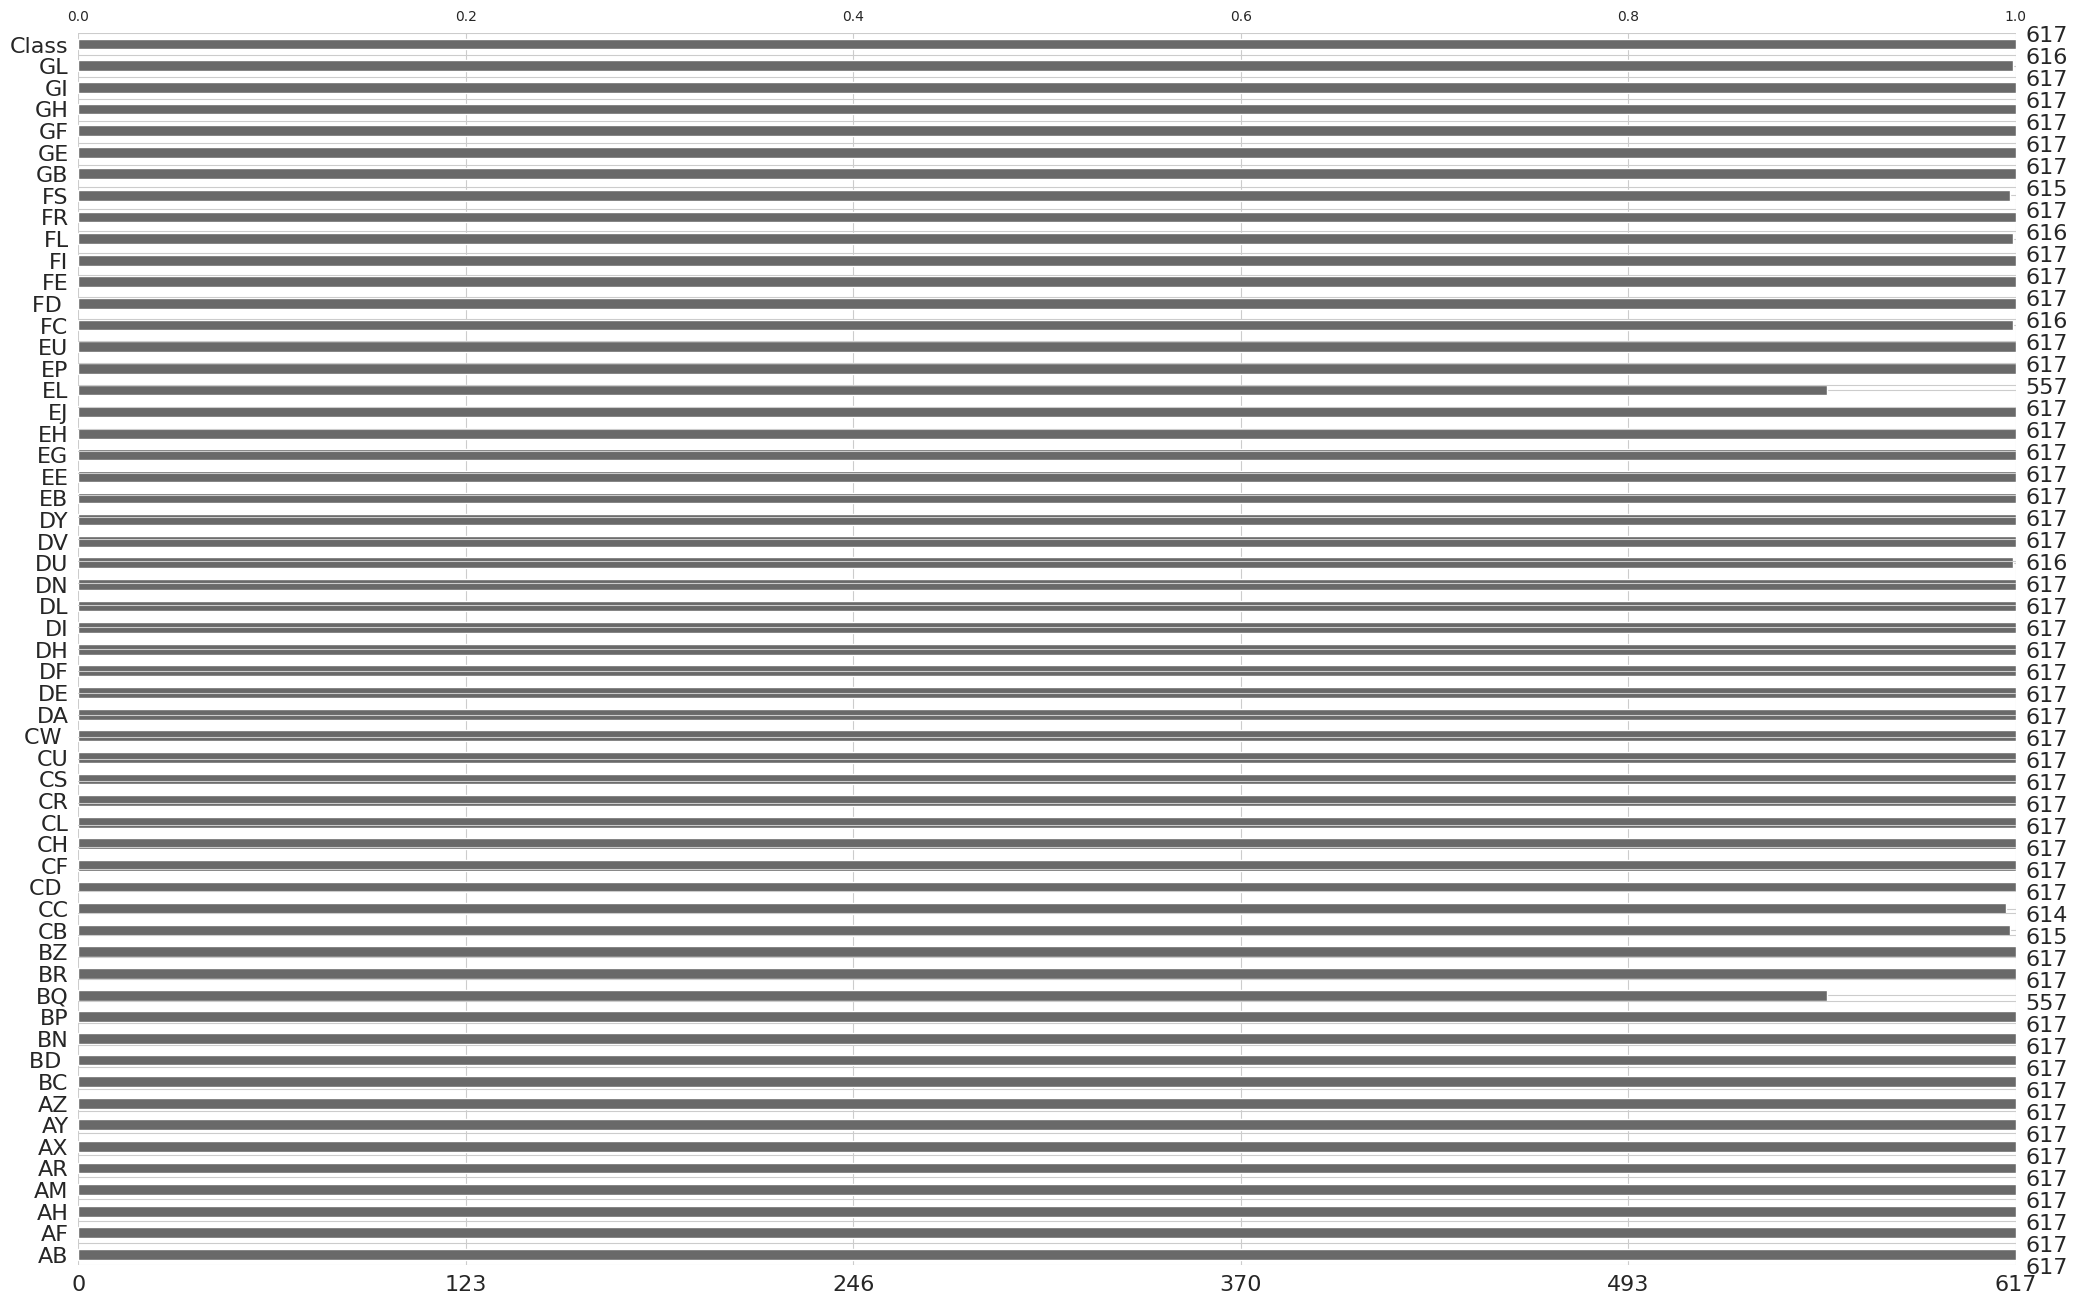

In [140]:
msno.bar(df_train)

<Axes: >

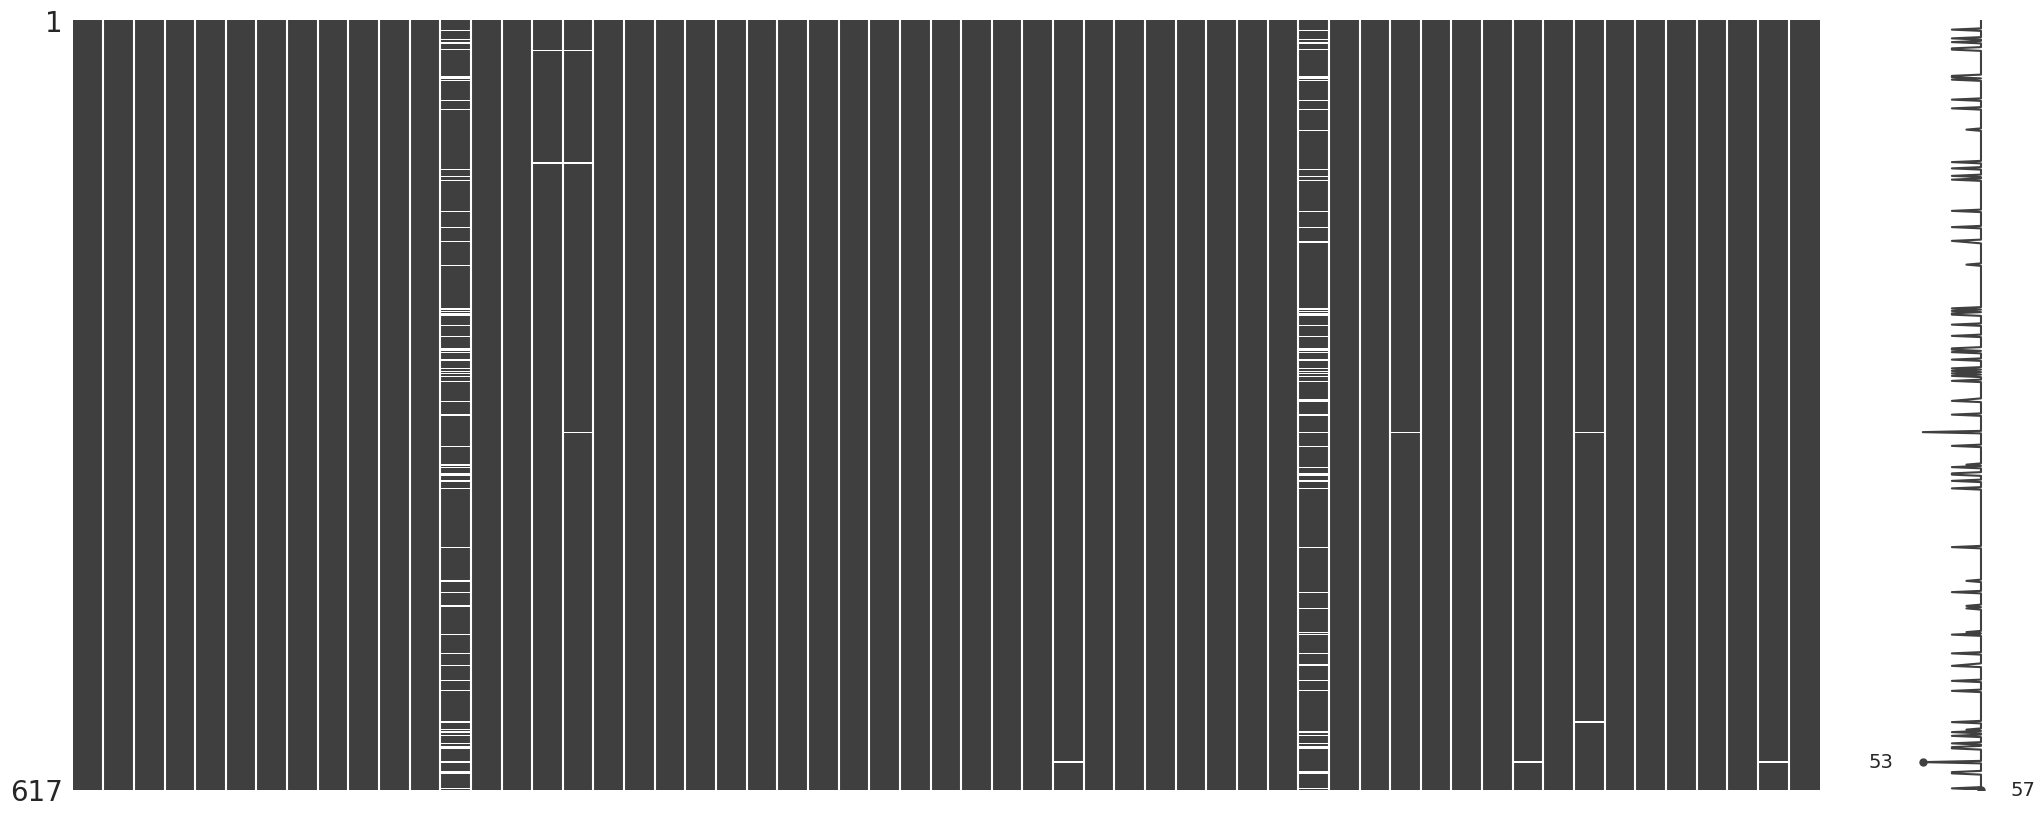

In [141]:
msno.matrix(df_train)

<Axes: >

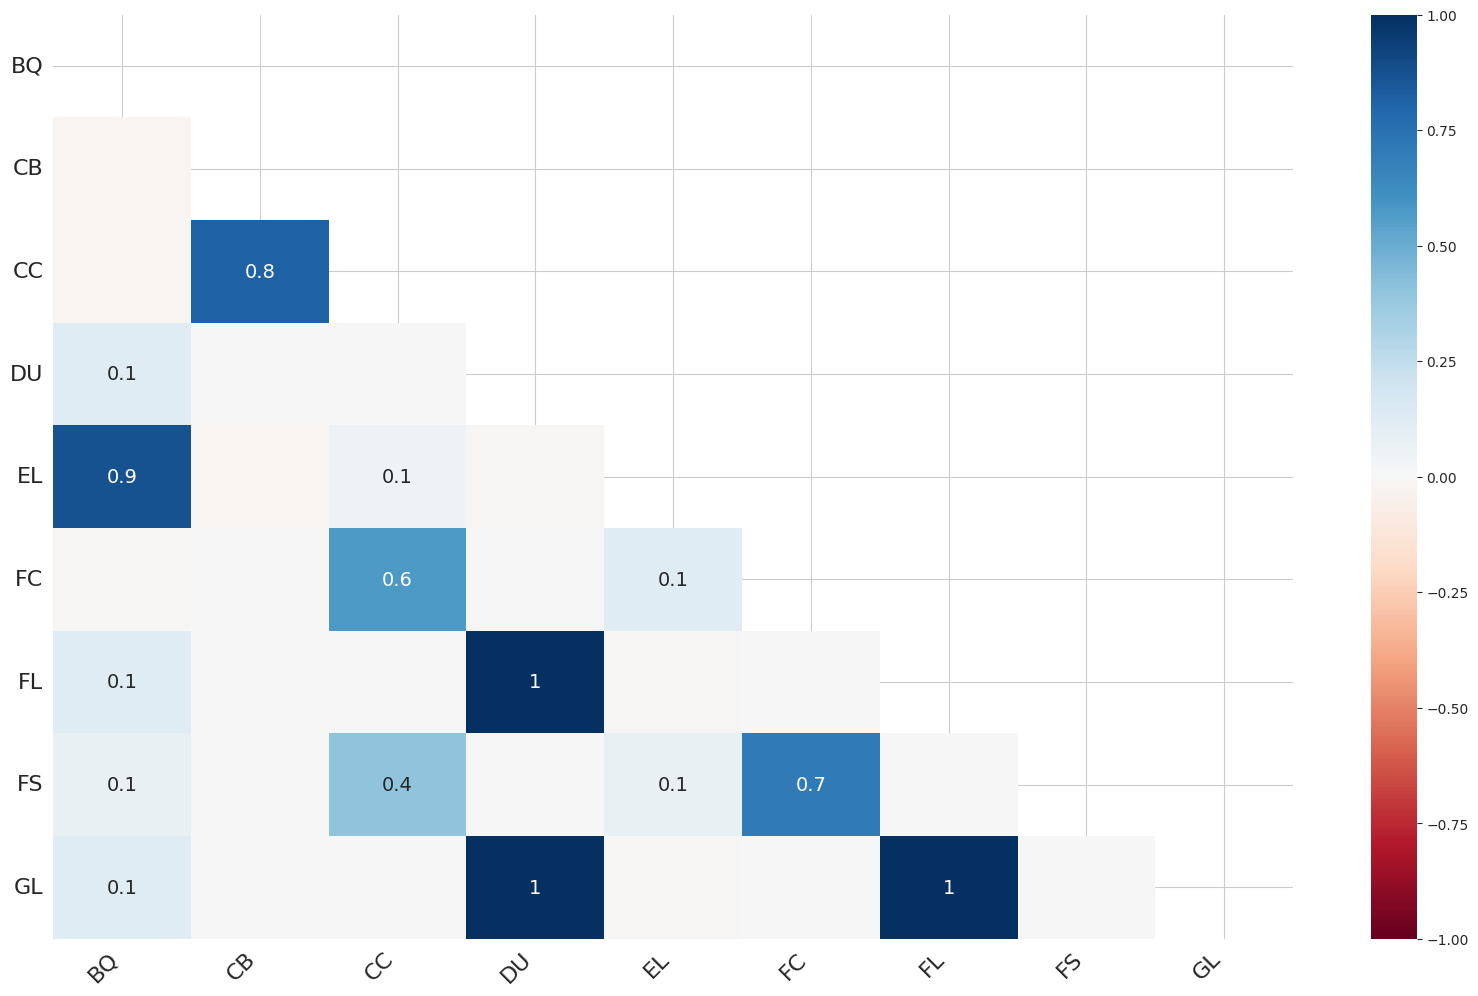

In [142]:
msno.heatmap(df_train)

A value near -1 means if one variable appears then the other variable is very likely to be missing.
A value near 0 means there is no dependence between the occurrence of missing values of two variables.
A value near 1 means if one variable appears then the other variable is very likely to be present

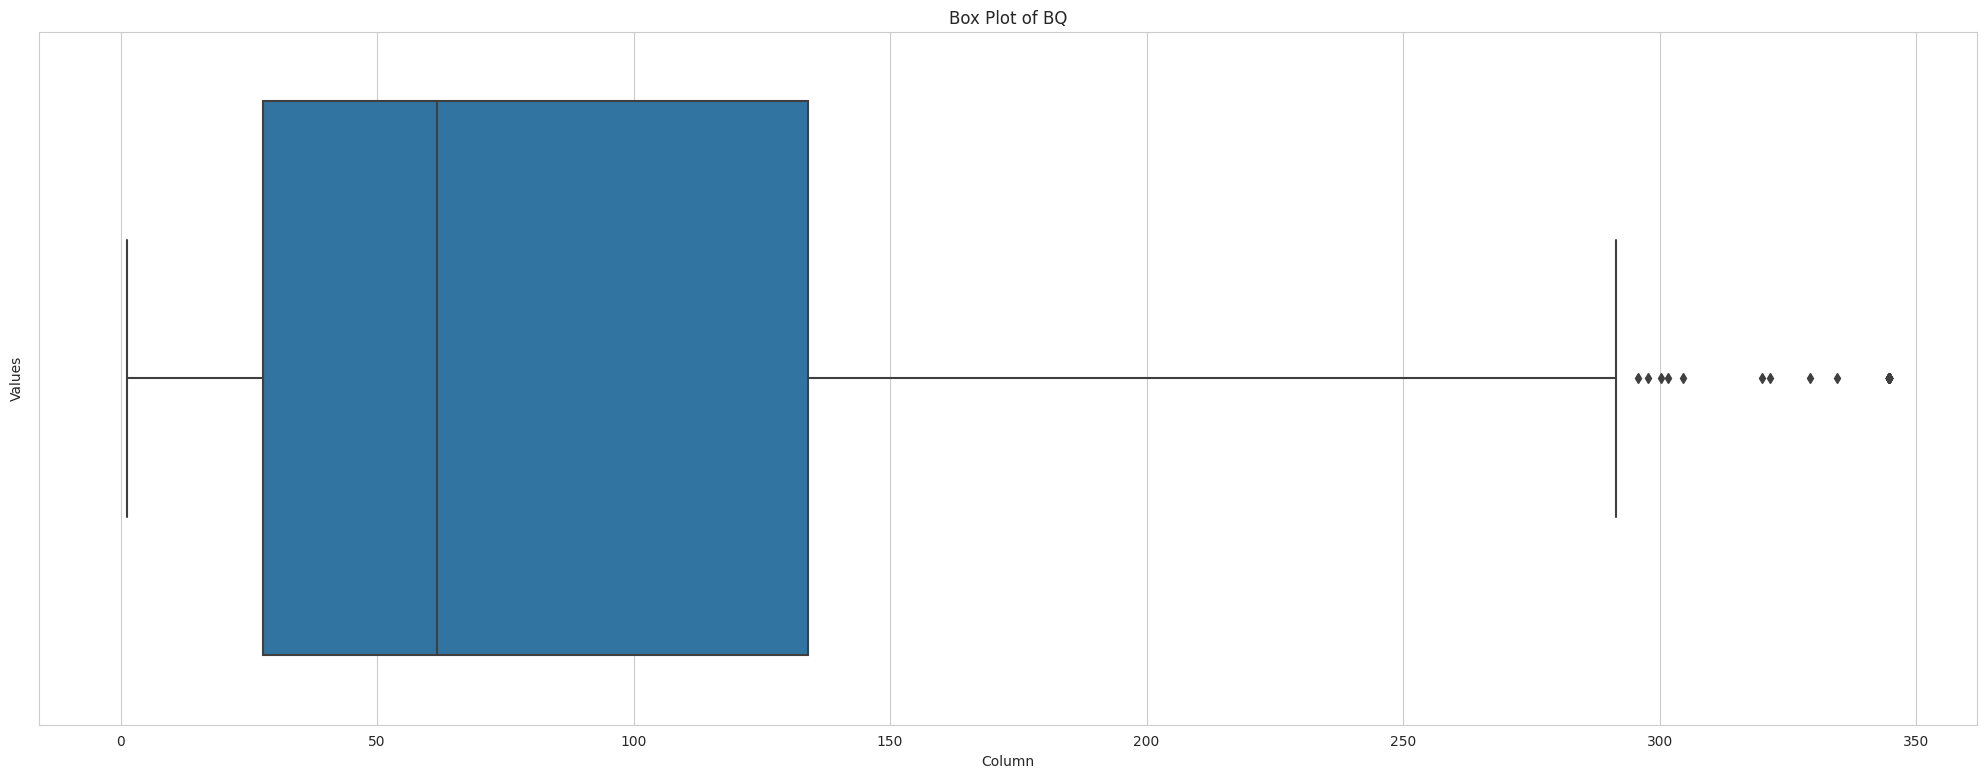

In [143]:
sns.boxplot(data=df_train, x="BQ")
plt.title("Box Plot of BQ")
plt.xlabel("Column")
plt.ylabel("Values")
plt.show()

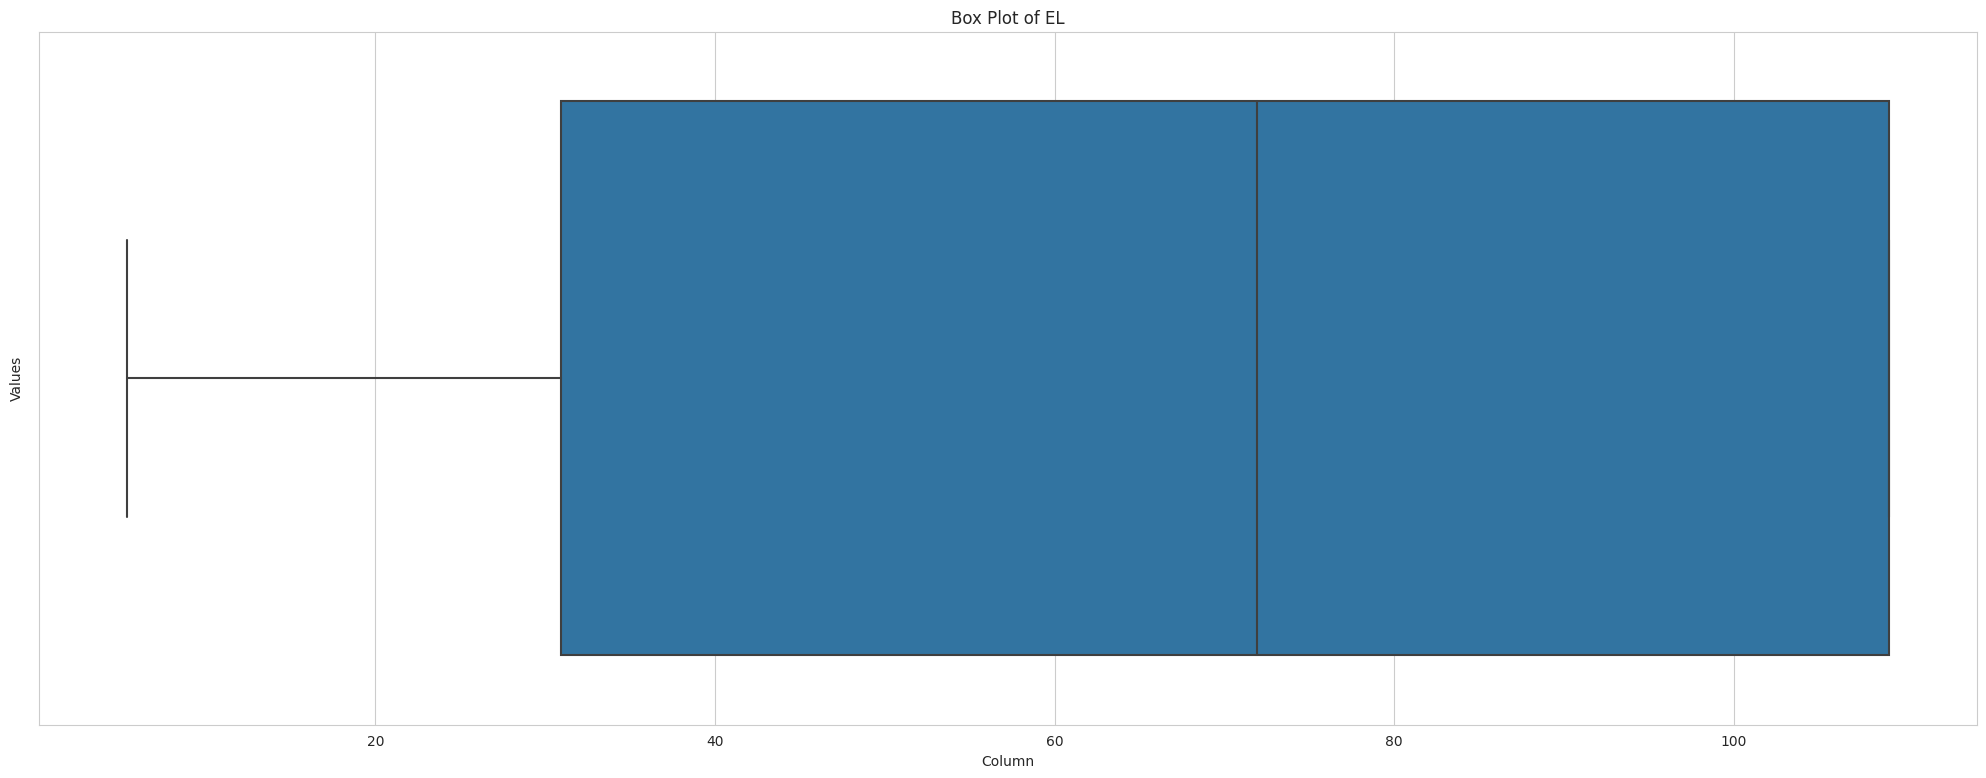

In [144]:
sns.boxplot(data=df_train, x="EL")
plt.title("Box Plot of EL")
plt.xlabel("Column")
plt.ylabel("Values")
plt.show()

In [145]:
transformer = ColumnTransformer(transformers=[
    ('simple_impute',SimpleImputer(),['CB','CC','DU','FC','FL','FS','GL']),
    ('Knn_impute',KNNImputer(),['BQ','EL']),
    ('OHE',OneHotEncoder(drop='first'),['EJ'])

],remainder='passthrough')
temp_=transformer.fit_transform(df_train)

In [146]:
tcols=transformer.get_feature_names_out()
for x,cname in enumerate(tcols):
  tcols[x]=cname.split('__')[-1]
tcols

array(['CB', 'CC', 'DU', 'FC', 'FL', 'FS', 'GL', 'BQ', 'EL', 'EJ_B', 'AB',
       'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP',
       'BR', 'BZ', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU', 'CW ', 'DA',
       'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DV', 'DY', 'EB', 'EE', 'EG',
       'EH', 'EP', 'EU', 'FD ', 'FE', 'FI', 'FR', 'GB', 'GE', 'GF', 'GH',
       'GI', 'Class'], dtype=object)

In [147]:
df_t=pd.DataFrame(temp_,columns=tcols)
df_t

,CB,CC,DU,FC,FL,FS,GL,BQ,EL,EJ_B,...,FD,FE,FI,FR,GB,GE,GF,GH,GI,Class
0,47.223358,0.563481,5.310690,13.394640,7.298162,0.094822,0.120343,152.707705,30.879420,1.0,...,10.265073,9028.291921,3.583450,1.73855,11.339138,72.611063,2003.810319,22.136229,69.834944,1.0
1,30.284345,0.484710,0.005518,17.175984,0.173229,0.568932,21.978000,14.754720,109.125159,0.0,...,0.296850,6785.003474,10.358927,0.49706,9.292698,72.611063,27981.562750,29.135430,32.131996,0.0
2,32.563713,0.495852,1.289739,224.207424,7.709560,1.198821,0.196941,219.320160,109.125159,1.0,...,8.745201,8338.906181,11.626917,0.97556,37.077772,88.609437,13676.957810,28.022851,35.192676,0.0
3,15.201914,0.717882,2.655345,59.301984,6.122162,0.284466,0.155829,11.050410,31.674357,1.0,...,7.884336,10965.766040,14.852022,0.49706,18.529584,82.416803,2094.262452,39.948656,90.493248,0.0
4,82.213495,0.536467,1.144902,29.102640,8.153058,0.121914,0.096614,149.717165,109.125159,1.0,...,4.274640,16198.049590,13.666727,48.50134,16.408728,146.109943,8524.370502,45.381316,36.262628,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,41.368691,0.691257,0.005518,29.708112,0.173229,0.067730,21.978000,27.287375,51.618996,0.0,...,0.296850,17167.209610,9.879296,1.26092,8.967128,217.148554,8095.932828,24.640462,69.191944,0.0
613,61.910576,0.772304,0.648318,69.343680,10.223150,0.426699,0.145340,344.644105,109.125159,1.0,...,6.067614,18460.330020,10.910227,1.24236,35.896418,496.994214,3085.308063,29.648928,124.808872,0.0
614,90.411867,0.708616,0.005518,71.725584,0.173229,0.067730,21.978000,103.988995,109.125159,0.0,...,0.296850,5088.922912,12.029366,0.49706,19.962092,128.896894,6474.652866,26.166072,119.559420,0.0
615,12.499760,0.602254,0.510378,38.133312,9.256996,0.670527,0.184622,98.328737,69.582596,1.0,...,6.192291,6464.250832,8.026928,0.78764,24.594488,72.611063,1965.343176,25.116750,37.155112,0.0


<Axes: >

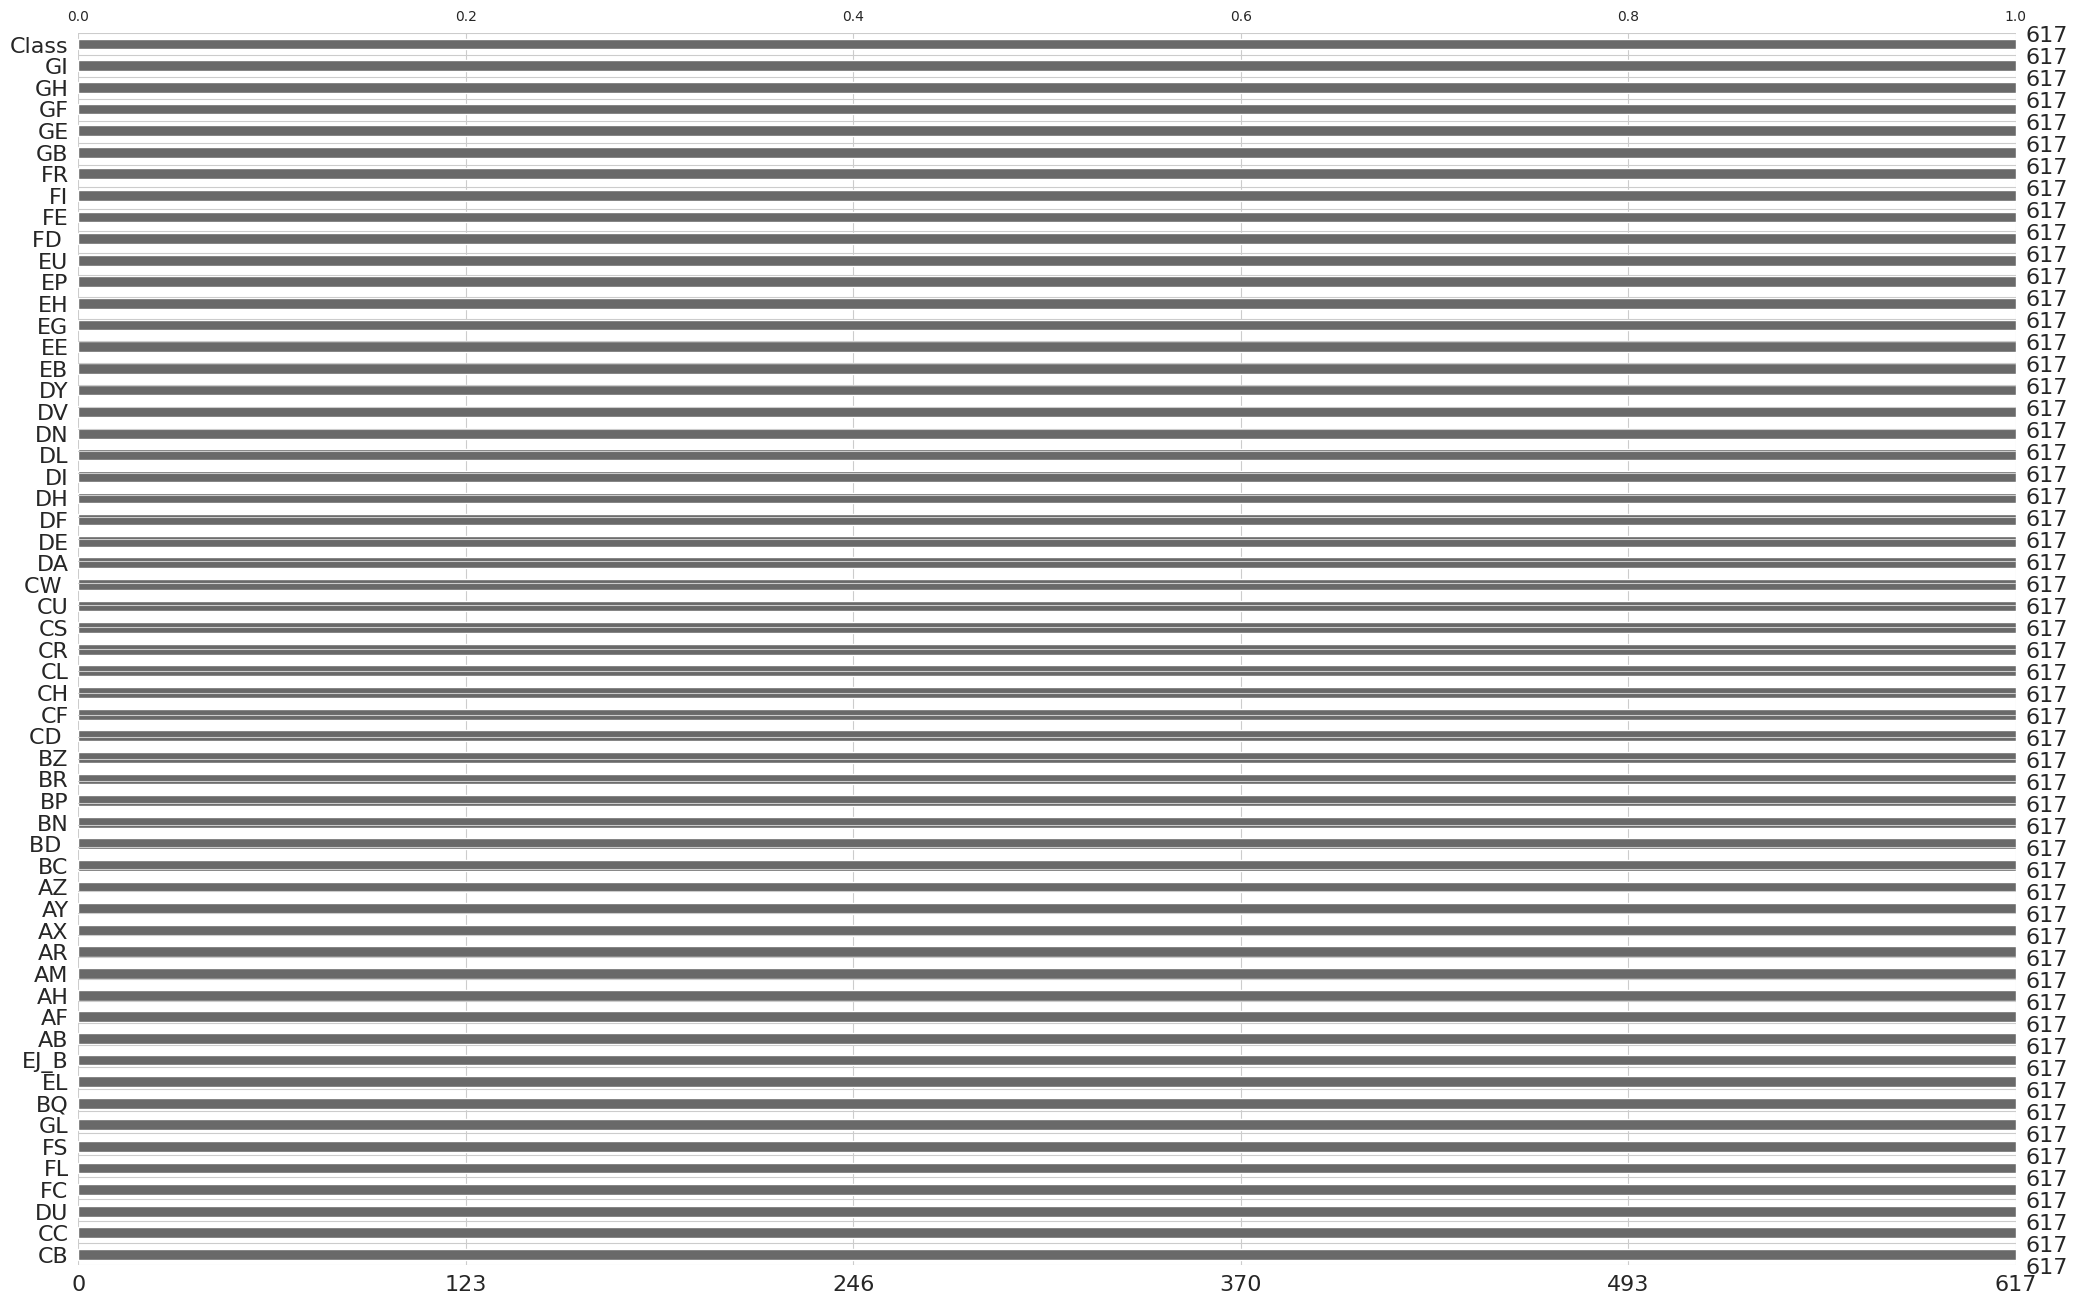

In [149]:
msno.bar(df_t)

([<matplotlib.patches.Wedge at 0x7f38e4e72680>,
 [Text(-1.023088328255151, 0.6271285933427695, 'CLass0'),
  Text(1.02308826953913, -0.6271286891312092, 'CLass1')],
 [Text(-0.5968015248155046, 0.36582501278328217, '82%'),
  Text(0.5968014905644925, -0.36582506865987197, '18%')])

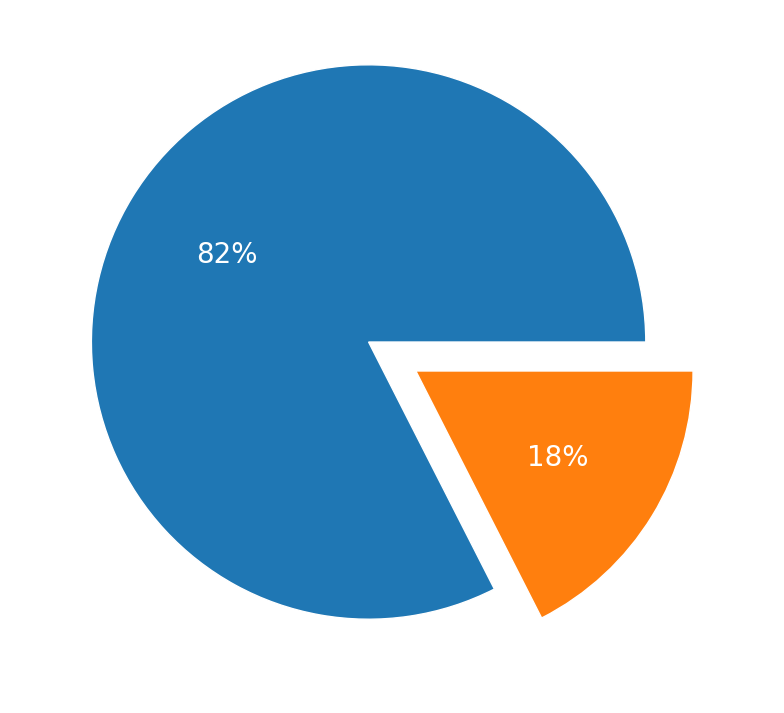

In [174]:
fig, ax = plt.subplots(figsize=(16, 9), subplot_kw=dict(aspect="equal"))
plt.pie(
    df_t['Class'].value_counts(),
    labels=["CLass0",'CLass1'],
    autopct = '%1.f%%',
    textprops = {'size' : 20, 'color' : 'white'},
    explode = [0.1,0.1],
    )

<Axes: xlabel='CB', ylabel='Density'>

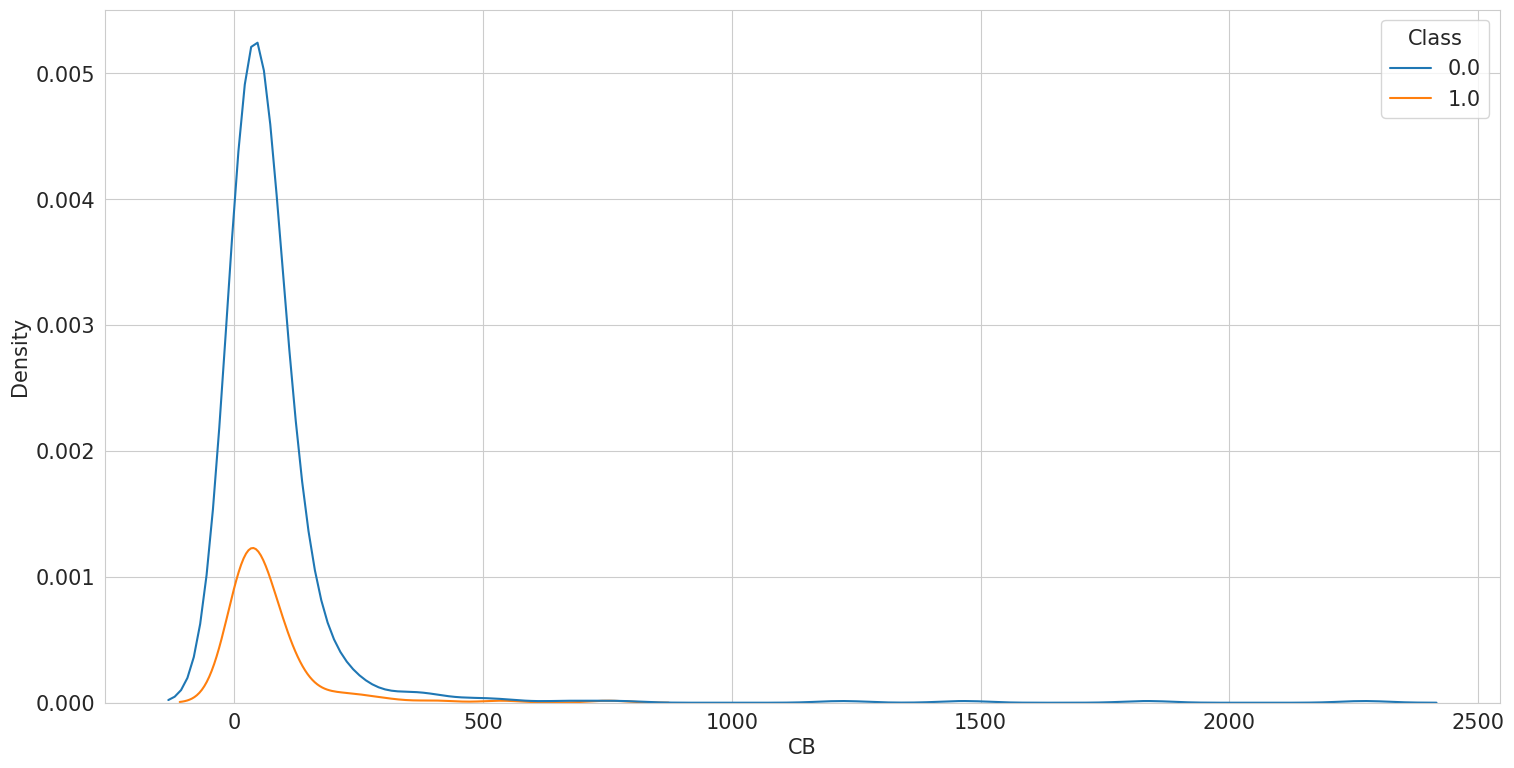

In [153]:
sns.kdeplot(df_t,x="CB",hue="Class")